In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
# DEFINING THE PATH

Path  = r'/Users/ghalebju/Desktop/Data Analysis Format/part 6/Zomato rest/Zomato Bangalore Restaurants analysis”/02 Data'

In [4]:
# IMPORTING DATA FRAME

df = pd.read_csv(os.path.join (Path,'Prepared Data','Zomato_clean'))

In [5]:
#describe data frame

df.describe()

,Unnamed: 0,votes,approx_cost(for two people)
count,23183.000000,23183.000000,23183.000000
mean,26047.837640,601.136997,755.820644
std,14796.998053,1115.055547,521.414285
min,0.000000,0.000000,40.000000
25%,13044.000000,101.000000,400.000000
50%,26561.000000,221.000000,600.000000
75%,38729.500000,586.000000,1000.000000
max,51715.000000,16832.000000,6000.000000


In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [7]:
# Columns to delete
columns_to_delete = ["Unnamed: 0" ,"address", "name", "online_order" , "book_table" , "phone" , "location" , "rest_type" , "cuisines" , "dish_liked" , "menu_item" , "reviews_list" , "listed_in(type)" , "listed_in(city)"]

In [8]:
df_no_cualt_var = df.drop(columns=columns_to_delete)

In [9]:
df_no_cualt_var

,rate,votes,approx_cost(for two people)
0,"4,1",775,800
1,"4,1",787,800
2,"3,8",918,800
3,"3,7",88,300
4,"3,8",166,600
...,...,...,...
23178,"3,8",128,1200
23179,"3,9",77,2000
23180,"2,8",161,1200
23181,"2,5",81,800


In [10]:
df_no_cualt_var['rate']=df['rate'].str.replace(',','.')

In [11]:
df_last = df_no_cualt_var[df_no_cualt_var['rate'] != 'NEW']

In [12]:
df_last['rate'] = df_last['rate'].astype('float64')

/var/folders/s5/185t061116b37123q55fx3hc0000gn/T/ipykernel_60554/265019791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['rate'] = df_last['rate'].astype('float64')


In [13]:
score = [kmeans[i].fit(df_last).score(df_last) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/g

[-35034603309.253105,
 -17227699067.031815,
 -11256104444.7411,
 -7723135740.954236,
 -5990167205.436072,
 -4837355855.67969,
 -3873487650.886528,
 -3212421844.825899,
 -2762671564.186777]

In [14]:
df_last.head ()

,rate,votes,approx_cost(for two people)
0,4.1,775,800
1,4.1,787,800
2,3.8,918,800
3,3.7,88,300
4,3.8,166,600


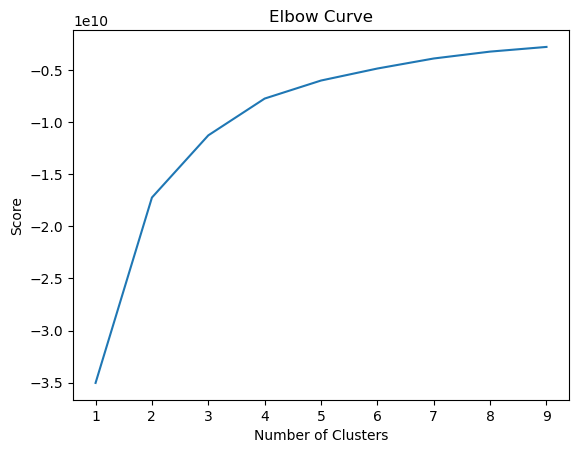

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [17]:
kmeans.fit(df_last)

/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

we chose as a value for kmeans the number 4 because when observing
the elbow curl how it starts to go up softly

In [18]:
df_last['clusters'] = kmeans.fit_predict(df_last)

/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/s5/185t061116b37123q55fx3hc0000gn/T/ipykernel_60554/330161399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['clusters'] = kmeans.fit_predict(df_last)


In [19]:
df_last.head()

,rate,votes,approx_cost(for two people),clusters
0,4.1,775,800,3
1,4.1,787,800,3
2,3.8,918,800,0
3,3.7,88,300,3
4,3.8,166,600,3


In [20]:
df_last['clusters'].value_counts()

3    16724
0     4304
2     1805
1      203
Name: clusters, dtype: int64

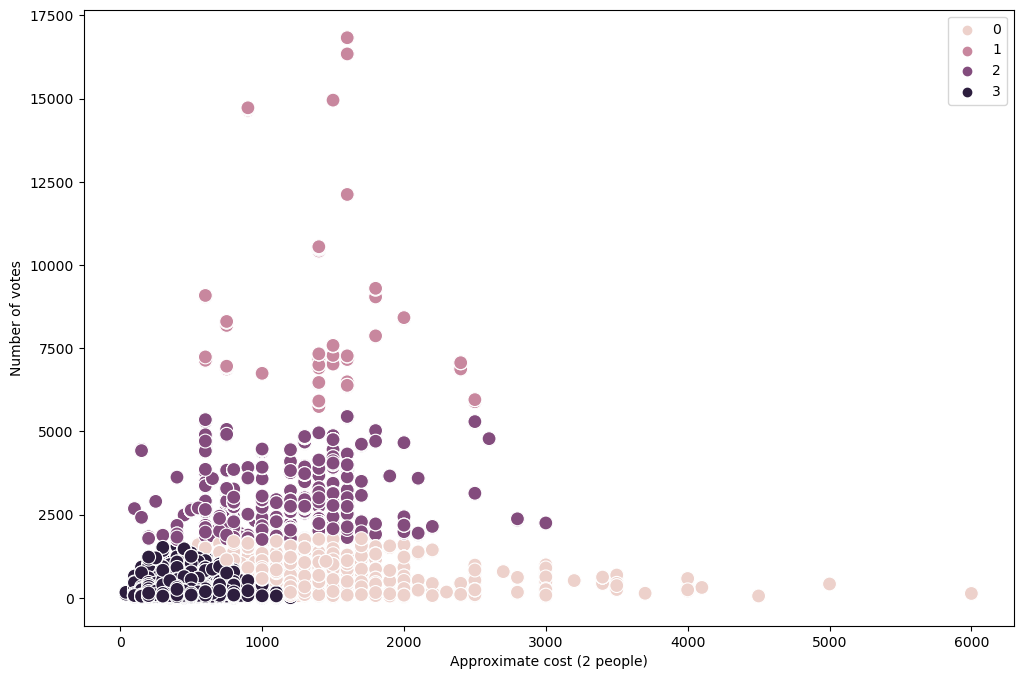

In [21]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_last['approx_cost(for two people)'], y=df_last['votes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Approximate cost (2 people)') # Label x-axis.
plt.ylabel('Number of votes') # Label y-axis.
plt.show()

the cluster codes as 3 in the legend shows almost no relationship between the two variables.

the clusters coded as 0 in the legend and the cluster coded as 2 both show slightly negative relationship between two variables
where the number of vote goes lower when the approximate cost goes up 

finally the cluster coded as 1 in the legend represents only the observation with a very high number of votes and it shows how the vote variable (when it more than 7500) only covers those restaurants with a middel cost (not very low and not very high)


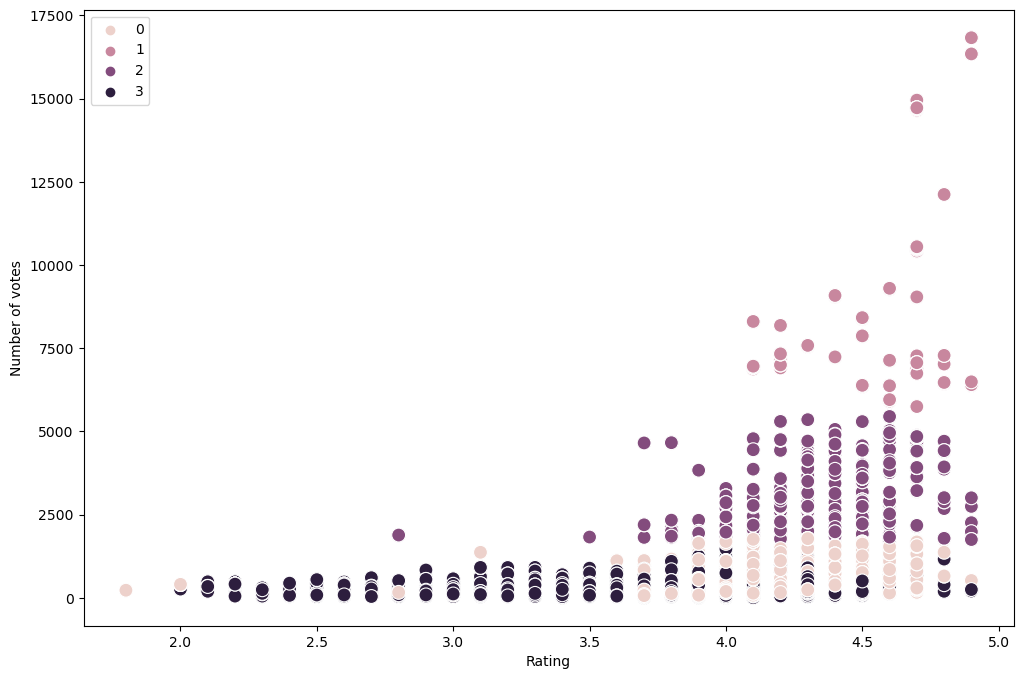

In [22]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_last['rate'], y=df_last['votes'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rating') 
plt.ylabel('Number of votes') 
plt.show()

#general observations we see a strong positive correlation between the two variables.

the cluster coded as 3 in the legend is presented only when the number of vote 2000 or less.
the cluster coded as 0 in the legend shows almost no relationship between two variables and finally both clusters 1 and 2 in the legend present a quite stonge positive correlation bertween two variables.

In [23]:
df_last.loc[df_last['clusters'] == 2, 'cluster'] = 'dark purple'
df_last.loc[df_last['clusters'] == 1, 'cluster'] = 'purple'
df_last.loc[df_last['clusters'] == 0, 'cluster'] = 'pink'
df_last.loc[df_last['clusters'] == 3, 'cluster'] = 'black'


/var/folders/s5/185t061116b37123q55fx3hc0000gn/T/ipykernel_60554/1661361959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last.loc[df_last['clusters'] == 2, 'cluster'] = 'dark purple'


In [24]:
df_last.groupby('cluster').agg({'votes':['mean', 'median'], 
                         'rate':['mean', 'median'],
                          'approx_cost(for two people)':['mean', 'median']})

votes              rate        approx_cost(for two people)  \
                    mean  median      mean median                        mean   
cluster                                                                         
black         240.962509   162.0  3.793937    3.9                  519.785338   
dark purple  2803.553463  2540.0  4.323047    4.3                 1168.144044   
pink          722.190056   679.0  4.128230    4.1                 1464.835037   
purple       8559.517241  7544.0  4.529557    4.5                 1320.443350   

                     
             median  
cluster              
black         500.0  
dark purple  1200.0  
pink         1300.0  
purple       1400.0

In [25]:
df_last.to_csv(os.path.join(Path,'Prepared Data', 'Zomato_last_1.csv'))